📂 Please upload your CSV file...


Saving output_file.csv to output_file.csv
✅ Loaded file: output_file.csv
✅ Data range: 2024-07-18 10:30:00 → 2025-02-27 23:10:01


/tmp/ipython-input-1-499222498.py:40: FutureWarning: Parsed string "Thu Jul 18 10:30:00 IST 2024" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
/tmp/ipython-input-1-499222498.py:47: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('1H').mean().interpolate()
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8yahgsz_/0yy496wl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8yahgsz_/onfi077n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57046', 'data', 'file=/tmp/tmp8yahgsz_/0yy496wl.json', 'init=/tmp/tmp8yahgsz_/onfi077n.js

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 168, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 168, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 183)            │        11,895 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,751 (209.96 KB)

 Trainable params: 53,751 (209.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1340
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - loss: 0.1306
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 0.1286
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 0.1249
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 0.1214
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 0.1174
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 0.1133
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - loss: 0.1057
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.0988
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.0858
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.0751
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.0610
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.0485
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.0485
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.0543
Epoch 1

/tmp/ipython-input-1-499222498.py:146: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


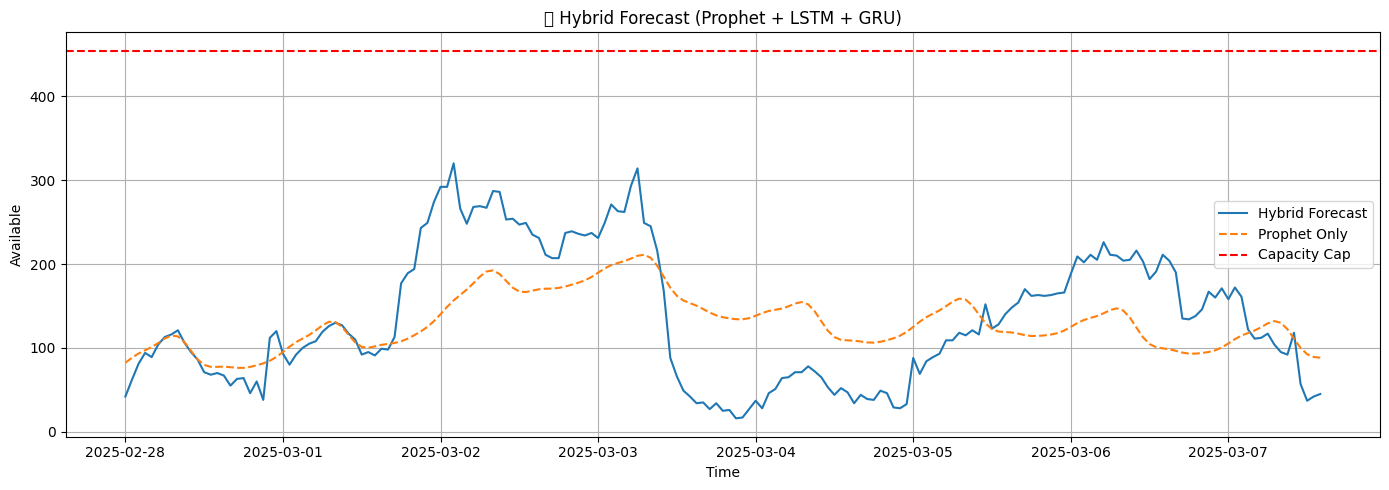

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Forecast saved to: prophet_lstm_gru_hybrid_forecast.csv


In [1]:
# ============================================================
# ✅ Colab: Hybrid Forecast (Prophet + LSTM + GRU)
# ============================================================

# ------------------------------------------------------------
# 0. Install required libraries
# ------------------------------------------------------------
!pip install prophet scikit-learn tensorflow matplotlib pandas --quiet

# ------------------------------------------------------------
# 1. Standard imports
# ------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files

# ------------------------------------------------------------
# 2. Upload CSV file
# ------------------------------------------------------------
print("📂 Please upload your CSV file...")
uploaded = files.upload()

for fn in uploaded.keys():
    file_path = fn

print(f"✅ Loaded file: {file_path}")

# ------------------------------------------------------------
# 3. Load and preprocess data
# ------------------------------------------------------------
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
df = df.dropna(subset=['Date']).sort_values('Date')
df = df[['Date', 'Available']].set_index('Date')

print("✅ Data range:", df.index.min(), "→", df.index.max())

# Ensure hourly frequency
df = df.resample('1H').mean().interpolate()

# ------------------------------------------------------------
# 4. Prophet forecasting (base forecast)
# ------------------------------------------------------------
df_prophet = df.reset_index().rename(columns={'Date': 'ds', 'Available': 'y'})
cap_value = df_prophet['y'].max() * 1.1
df_prophet['cap'] = cap_value

model = Prophet(
    growth='logistic',
    daily_seasonality=True,
    yearly_seasonality=True,
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=10.0
)
model.fit(df_prophet)

# Predict next 183 hours
future = model.make_future_dataframe(periods=183, freq='1H')
future['cap'] = cap_value
forecast = model.predict(future)

# ------------------------------------------------------------
# 5. Compute residuals for training LSTM+GRU
# ------------------------------------------------------------
merged = pd.merge(df_prophet, forecast[['ds', 'yhat']], on='ds', how='inner')
merged['residual'] = merged['y'] - merged['yhat']
residuals = merged[['ds', 'residual']].set_index('ds').resample('1H').mean().interpolate()

# ------------------------------------------------------------
# 6. Prepare training data for LSTM+GRU
# ------------------------------------------------------------
input_len = 168
forecast_len = 183

residual_values = residuals['residual'].values.reshape(-1, 1)

scaler = MinMaxScaler()
residual_scaled = scaler.fit_transform(residual_values)

X_seq = residual_scaled[-(input_len + forecast_len):-forecast_len]
y_seq = residual_scaled[-forecast_len:]

X = X_seq.reshape(1, input_len, 1)
y = y_seq.reshape(1, forecast_len)

# ------------------------------------------------------------
# 7. Build LSTM + GRU model
# ------------------------------------------------------------
model_rnn = Sequential([
    LSTM(64, return_sequences=True, input_shape=(input_len, 1)),
    Dropout(0.2),
    GRU(64, return_sequences=False),
    Dense(forecast_len)
])

model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.summary()

# ------------------------------------------------------------
# 8. Train model
# ------------------------------------------------------------
es = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model_rnn.fit(X, y, epochs=100, batch_size=1, callbacks=[es], verbose=1)

# ------------------------------------------------------------
# 9. Predict residuals for next 183 hours
# ------------------------------------------------------------
last_input = residual_scaled[-input_len:].reshape(1, input_len, 1)
predicted_scaled = model_rnn.predict(last_input)[0]
predicted_residuals = scaler.inverse_transform(predicted_scaled.reshape(-1, 1)).flatten()

# ------------------------------------------------------------
# 10. Combine Prophet + Residuals for Hybrid Forecast
# ------------------------------------------------------------
forecast_range = forecast.tail(forecast_len).copy()
hybrid_forecast = forecast_range['yhat'].values + predicted_residuals
hybrid_forecast = np.clip(hybrid_forecast, 0, cap_value)

final_df = pd.DataFrame({
    'Date': forecast_range['ds'].values,
    'Prophet': forecast_range['yhat'].values,
    'Residuals': predicted_residuals,
    'Hybrid_Available': hybrid_forecast.astype(int)
})

# ------------------------------------------------------------
# 11. Plot Hybrid Forecast
# ------------------------------------------------------------
plt.figure(figsize=(14, 5))
plt.plot(final_df['Date'], final_df['Hybrid_Available'], label='Hybrid Forecast')
plt.plot(final_df['Date'], final_df['Prophet'], label='Prophet Only', linestyle='--')
plt.axhline(cap_value, color='red', linestyle='--', label='Capacity Cap')
plt.title('✅ Hybrid Forecast (Prophet + LSTM + GRU)')
plt.xlabel('Time')
plt.ylabel('Available')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 12. Download results
# ------------------------------------------------------------
output_csv = "prophet_lstm_gru_hybrid_forecast.csv"
final_df.to_csv(output_csv, index=False)
files.download(output_csv)

print(f"✅ Forecast saved to: {output_csv}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
📂 Please upload your ODS file (check.ods or cleaned version)...


Saving check.ods to check.ods

📂 Please upload your CSV file (prophet_lstm_gru_hybrid_forecast.csv or cleaned version)...


Saving prophet_lstm_gru_hybrid_forecast.csv to prophet_lstm_gru_hybrid_forecast (1).csv

✅ ODS File: check.ods
✅ CSV File: prophet_lstm_gru_hybrid_forecast (1).csv
✅ Loaded CSV with encoding='utf-8' and delimiter=','

📝 ODS Columns: ['Date', 'Total Node', 'In Use', 'Offline', 'Available']
📝 CSV Columns: ['Date', 'Prophet', 'Residuals', 'Available']


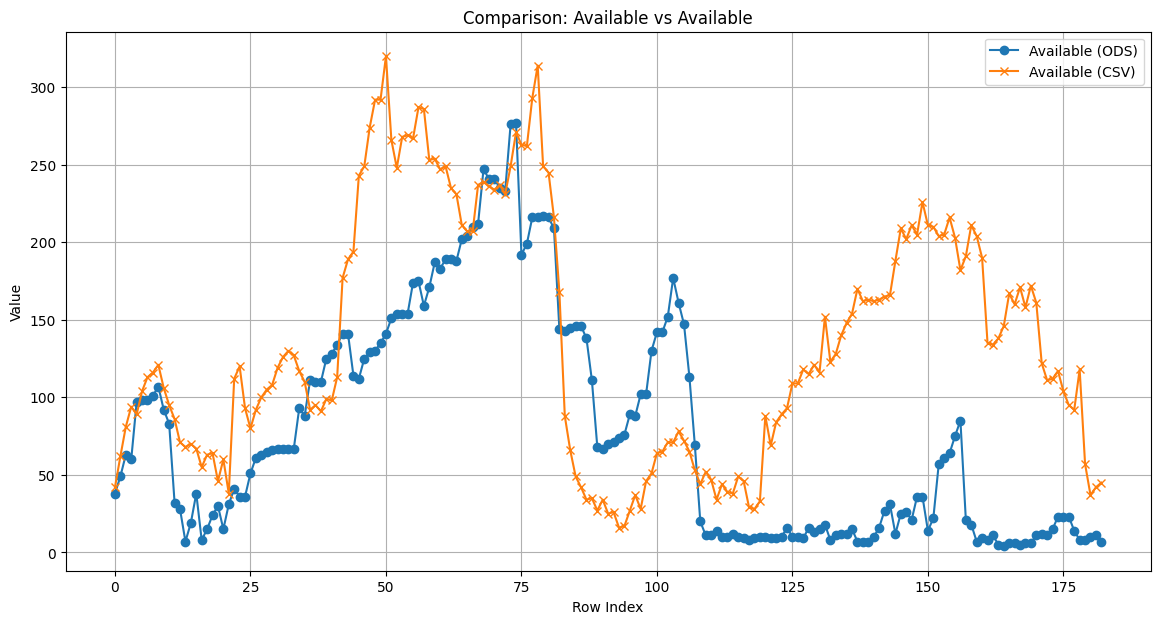

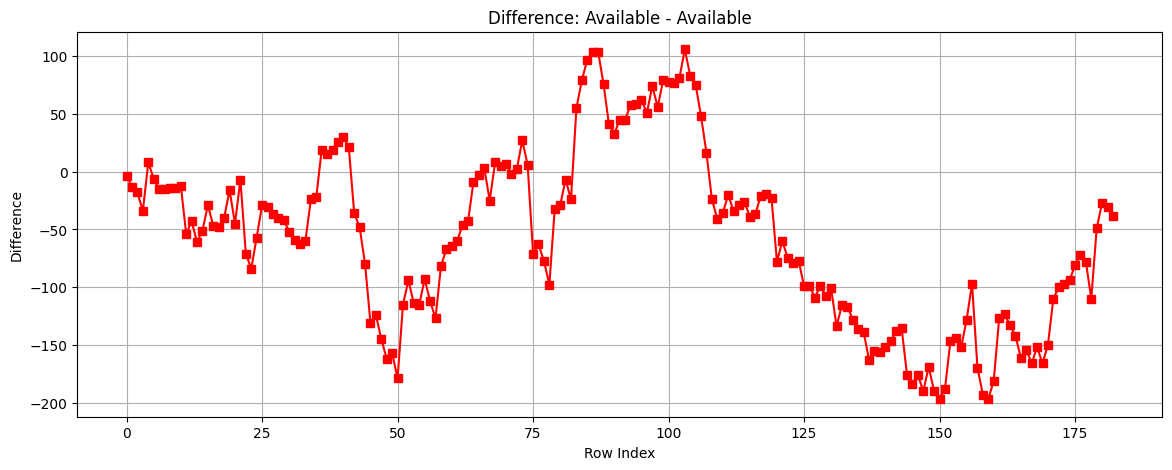


📊 First few differences:
0    -4
1   -13
2   -18
3   -34
4     8
Name: Available, dtype: int64

✅ Comparison saved as 'available_comparison_prophet_lstm_gru.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
 # ============================================
# 📊 Compare 'Available' vs 'Hybrid_Available'
# ============================================

# STEP 1: Install required libraries
!pip install pandas odfpy matplotlib --quiet

# STEP 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# STEP 3: Upload files
print("📂 Please upload your ODS file (check.ods or cleaned version)...")
uploaded1 = files.upload()

print("\n📂 Please upload your CSV file (prophet_lstm_gru_hybrid_forecast.csv or cleaned version)...")
uploaded2 = files.upload()

# Get uploaded file names
ods_file = list(uploaded1.keys())[0]
csv_file = list(uploaded2.keys())[0]

print(f"\n✅ ODS File: {ods_file}")
print(f"✅ CSV File: {csv_file}")

# STEP 4: Load ODS
ods_df = pd.read_excel(ods_file, engine='odf') if ods_file.endswith('.ods') else pd.read_csv(ods_file)

# STEP 5: Load CSV with fallback
def load_csv(filename):
  for enc in ['utf-8', 'cp1252', 'ISO-8859-1']:
    for delim in [',', ';', '\t']:
      try:
        df = pd.read_csv(filename, encoding=enc, delimiter=delim, on_bad_lines='skip')
        print(f"✅ Loaded CSV with encoding='{enc}' and delimiter='{delim}'")
        return df
      except Exception:
        continue
  raise ValueError(f"❌ Could not load {filename}.")

csv_df = load_csv(csv_file)

# STEP 6: Clean columns
ods_df.columns = ods_df.columns.str.strip()
csv_df.columns = csv_df.columns.str.strip()

print("\n📝 ODS Columns:", list(ods_df.columns))
print("📝 CSV Columns:", list(csv_df.columns))

# STEP 7: Correct columns
ods_column = 'Available'
csv_column = 'Hybrid_Available' if 'Hybrid_Available' in csv_df.columns else 'Available'

# STEP 8: Extract & ensure numeric
available_ods = ods_df[ods_column].apply(pd.to_numeric, errors='coerce').dropna().reset_index(drop=True)
available_csv = csv_df[csv_column].apply(pd.to_numeric, errors='coerce').dropna().reset_index(drop=True)

# STEP 9: Align length
min_len = min(len(available_ods), len(available_csv))
available_ods = available_ods[:min_len]
available_csv = available_csv[:min_len]
difference = available_ods - available_csv

# STEP 10: Plot comparison
plt.figure(figsize=(14, 7))
plt.plot(available_ods, label=f'{ods_column} (ODS)', marker='o')
plt.plot(available_csv, label=f'{csv_column} (CSV)', marker='x')
plt.title(f"Comparison: {ods_column} vs {csv_column}")
plt.xlabel("Row Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Plot difference
plt.figure(figsize=(14, 5))
plt.plot(difference, color='red', marker='s')
plt.title(f"Difference: {ods_column} - {csv_column}")
plt.xlabel("Row Index")
plt.ylabel("Difference")
plt.grid(True)
plt.show()

print("\n📊 First few differences:")
print(difference.head())

# STEP 11: Save results
comparison_df = pd.DataFrame({
    'ODS_Available': available_ods,
    'CSV_Hybrid_Available': available_csv,
    'Difference': difference
})
comparison_df.to_csv('available_comparison_prophet_lstm_gru.csv', index=False)
print("\n✅ Comparison saved as 'available_comparison_prophet_lstm_gru.csv'.")

# Optional: Download result
files.download('available_comparison_prophet_lstm_gru.csv')
